In [ ]:
# TODO
# 1. Agg. OHLCV from CG & Token Contract Addr
# 2. OHLCV from CCXT, given exchange
# 3. OHLCV from DEX through CMC 




# CG

In [10]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv

# 加載 .env 文件中的環境變量
load_dotenv()

# 獲取 API 金鑰
api_key = os.getenv('CG_API')

# 檢查 API 金鑰是否存在
if not api_key:
    print("Error: API_KEY not found in environment variables.")
    exit(1)

coin_id = 'pudgy-penguins'
currency = 'usd'
days = 'max'  # 獲取所有可用的數據
interval = 'daily'

# API URL
url = f'https://pro-api.coingecko.com/api/v3/coins/{coin_id}/market_chart?vs_currency={currency}&days={days}&interval={interval}'

# 設置請求頭
headers = {
    'Accept': 'application/json',
    'X-CG-PRO-API-KEY': api_key,
}

# 發送請求
response = requests.get(url, headers=headers)

# 檢查請求是否成功
if response.status_code == 200:
    data = response.json()
    
    # 提取價格數據
    prices = data['prices']  # prices 是一個列表，包含 [timestamp, price] 的數組
    market_caps = data['market_caps']  # market_caps 是一個列表，包含 [timestamp, market cap] 的數組
    total_volumes = data['total_volumes']  # total_volumes 是一個列表，包含 [timestamp, volume] 的數組

    # 將數據轉換為 DataFrame
    df_prices = pd.DataFrame(prices, columns=['timestamp', 'price'])
    df_market_caps = pd.DataFrame(market_caps, columns=['timestamp', 'market_cap'])
    df_total_volumes = pd.DataFrame(total_volumes, columns=['timestamp', 'volume'])

    # 合併 DataFrame
    df = df_prices.merge(df_market_caps, on='timestamp').merge(df_total_volumes, on='timestamp')

    # 將 timestamp 轉換為日期時間格式
    df['date'] = pd.to_datetime(df['timestamp'], unit='ms')

    # 刪除原始 timestamp 列
    df.drop(columns=['timestamp'], inplace=True)

    # 顯示 DataFrame
    print(df)

    # 將 DataFrame 保存為 CSV 文件
    df.to_csv('cg_pudgy_penguins_market_data.csv', index=False)
    print("Data saved to pudgy_penguins_market_data.csv")
else:
    print(f"Error: {response.status_code} - {response.text}")

       price    market_cap        volume                date
0   0.027973  1.751294e+09  1.928364e+09 2024-12-17 00:00:00
1   0.027973  1.751294e+09  1.928364e+09 2024-12-18 00:00:00
2   0.035517  2.234872e+09  2.171298e+09 2024-12-19 00:00:00
3   0.028864  1.820435e+09  1.550611e+09 2024-12-20 00:00:00
4   0.027865  1.751440e+09  1.002219e+09 2024-12-21 00:00:00
5   0.028519  1.782519e+09  6.426657e+08 2024-12-22 00:00:00
6   0.025936  1.637721e+09  3.655500e+08 2024-12-23 00:00:00
7   0.030301  1.904181e+09  5.358603e+08 2024-12-24 00:00:00
8   0.036115  2.274612e+09  1.301506e+09 2024-12-25 00:00:00
9   0.037831  2.378093e+09  1.024763e+09 2024-12-26 00:00:00
10  0.038047  2.390386e+09  1.191051e+09 2024-12-27 00:00:00
11  0.033957  2.134402e+09  5.628087e+08 2024-12-28 00:00:00
12  0.035977  2.264965e+09  5.102095e+08 2024-12-29 00:00:00
13  0.031908  2.005991e+09  3.814519e+08 2024-12-30 00:00:00
14  0.030874  1.935262e+09  3.847469e+08 2024-12-31 00:00:00
15  0.033431  2.104358e+

# CEX

ace 不支持 PENGU/USDT 交易对，跳过。
获取 alpaca 的 PENGU/USDT OHLCV 数据时出错: alpaca requires "apiKey" credential
OHLCV 数据已成功更新并保存为 cex_ohlcv/ascendex_PENGU_USDT_ohlcv_data.csv
bequant 不支持 PENGU/USDT 交易对，跳过。
OHLCV 数据已成功更新并保存为 cex_ohlcv/bigone_PENGU_USDT_ohlcv_data.csv
OHLCV 数据已成功更新并保存为 cex_ohlcv/binance_PENGU_USDT_ohlcv_data.csv
binancecoinm 不支持 PENGU/USDT 交易对，跳过。
binanceus 不支持 PENGU/USDT 交易对，跳过。
binanceusdm 不支持 PENGU/USDT 交易对，跳过。
OHLCV 数据已成功更新并保存为 cex_ohlcv/bingx_PENGU_USDT_ohlcv_data.csv
bit2c 不支持 PENGU/USDT 交易对，跳过。
bitbank 不支持 PENGU/USDT 交易对，跳过。
bitbns 不支持 PENGU/USDT 交易对，跳过。
bitcoincom 不支持 PENGU/USDT 交易对，跳过。
bitfinex 不支持 PENGU/USDT 交易对，跳过。
bitfinex1 不支持 PENGU/USDT 交易对，跳过。
bitflyer 不支持 PENGU/USDT 交易对，跳过。
OHLCV 数据已成功更新并保存为 cex_ohlcv/bitget_PENGU_USDT_ohlcv_data.csv
bithumb 不支持 PENGU/USDT 交易对，跳过。
OHLCV 数据已成功更新并保存为 cex_ohlcv/bitmart_PENGU_USDT_ohlcv_data.csv
bitmex 不支持 PENGU/USDT 交易对，跳过。
bitopro 不支持 PENGU/USDT 交易对，跳过。
bitpanda 不支持 PENGU/USDT 交易对，跳过。
OHLCV 数据已成功更新并保存为 cex_ohlcv/bitrue_PENGU_USDT_ohlcv_
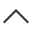

In [25]:
# CEX

import ccxt
import csv
import os
import pandas as pd

def fetch_and_update_ohlcv(symbol):
    # 创建文件夹，如果不存在的话
    folder_name = "cex_ohlcv"
    os.makedirs(folder_name, exist_ok=True)

    # 获取所有支持的交易所
    exchanges = ccxt.exchanges

    for exchange_name in exchanges:
        try:
            # 创建交易所实例
            exchange = getattr(ccxt, exchange_name)()
            # 加载市场信息
            exchange.load_markets()

            # 检查交易对是否存在
            if symbol in exchange.markets:
                # 获取新的 OHLCV 数据
                new_ohlcv = exchange.fetch_ohlcv(symbol, timeframe='1h')

                # 生成文件名
                filename = f"{exchange_name}_{symbol.replace('/', '_')}_ohlcv_data.csv"
                file_path = os.path.join(folder_name, filename)  # 文件完整路径

                # 检查是否已有文件，若存在则更新
                if os.path.exists(file_path):
                    # 读取已有数据
                    existing_ohlcv = pd.read_csv(file_path)
                    # 将新的数据转换为 DataFrame
                    new_ohlcv_df = pd.DataFrame(new_ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
                    
                    # 合并数据，去重
                    combined_ohlcv = pd.concat([existing_ohlcv, new_ohlcv_df]).drop_duplicates(subset=['timestamp']).reset_index(drop=True)
                else:
                    # 如果文件不存在，直接使用新的数据
                    combined_ohlcv = pd.DataFrame(new_ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

                # 保存更新后的数据
                combined_ohlcv.to_csv(file_path, index=False)
                print(f"OHLCV 数据已成功更新并保存为 {file_path}")

            else:
                print(f"{exchange_name} 不支持 {symbol} 交易对，跳过。")

        except Exception as e:
            print(f"获取 {exchange_name} 的 {symbol} OHLCV 数据时出错: {e}")

# 示例使用
symbol = 'PENGU/USDT'
fetch_and_update_ohlcv(symbol)

In [24]:
def merge_exchange_data(symbol):
    # Create folder name
    folder_name = "cex_ohlcv"
    target_exchanges = ['binance', 'okx', 'bybit', 'mexc', 'lbank']
    
    # Initialize an empty list to hold DataFrames
    dataframes = []

    for exchange_name in target_exchanges:
        filename = f"{exchange_name}_{symbol.replace('/', '_')}_ohlcv_data.csv"
        file_path = os.path.join(folder_name, filename)

        # Read the CSV file if it exists
        if os.path.exists(file_path):
            df = pd.read_csv(file_path)
            df['exchange'] = exchange_name  # Add exchange column
            dataframes.append(df)

    # Concatenate all DataFrames into one
    if dataframes:
        final_df = pd.concat(dataframes, ignore_index=True)
        # Sort by timestamp
        final_df.sort_values(by='timestamp', inplace=True)
        final_df.reset_index(drop=True, inplace=True)

        # Calculate vol_usd
        final_df['vol_usd'] = final_df['volume'] * final_df['close']
        
        # Convert timestamp to datetime
        final_df['date'] = pd.to_datetime(final_df['timestamp'], unit='ms')

        # Create date_d column
        final_df['date_d'] = final_df['date'].dt.date  # Initialize date_d with date
        final_df.loc[final_df['date'].dt.hour == 0, 'date_d'] = final_df['date'].dt.date - pd.Timedelta(days=1)

        # Save the merged DataFrame
        final_df.to_csv(os.path.join(folder_name, 'merged_ohlcv_data.csv'), index=False)
        print("Merged OHLCV data saved as merged_ohlcv_data.csv")
    else:
        print("No data found to merge.")

# Example usage
symbol = 'PENGU/USDT'
merge_exchange_data(symbol)

Merged OHLCV data saved as merged_ohlcv_data.csv


# DEX

1. get pools
2. read pools from file
3. get corresponding ohlcv from pools
4. cal. aggregated vol

In [5]:
# get pools

import os
import requests
import pandas as pd
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Get API key
api_key = os.getenv('CMC_API')

# Set request headers
headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': api_key,
}

def fetch_spot_pairs(network_slug, base_asset_contract_address):
    results = []
    
    url = f'https://pro-api.coinmarketcap.com/v4/dex/spot-pairs/latest?network_slug={network_slug}&base_asset_contract_address={base_asset_contract_address}'
    
    # Send request
    response = requests.get(url, headers=headers)
    
    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()
        results = data['data']  # Get data
    else:
        print(f"Error for {network_slug} and {base_asset_contract_address}: {response.status_code} - {response.text}")
    
    return results

def save_to_csv(spot_pairs_data, base_asset_name, network_slug):
    # Create folder
    folder_name = 'tokens_pool_addr'
    os.makedirs(folder_name, exist_ok=True)

    # Extract needed fields and save
    rows = []
    for item in spot_pairs_data:
        for quote in item['quote']:
            row = {
                'contract_address': item['contract_address'],
                'name': item['name'],
                'base_asset_id': item['base_asset_id'],
                'base_asset_name': item['base_asset_name'],
                'base_asset_symbol': item['base_asset_symbol'],
                'base_asset_contract_address': item['base_asset_contract_address'],
                'quote_asset_id': item['quote_asset_id'],
                'quote_asset_name': item['quote_asset_name'],
                'quote_asset_symbol': item['quote_asset_symbol'],
                'quote_asset_contract_address': item['quote_asset_contract_address'],
                'dex_id': item['dex_id'],
                'dex_slug': item['dex_slug'],
                'network_id': item['network_id'],
                'network_slug': item['network_slug'],
                'last_updated': item['last_updated'],
                'created_at': item['created_at'],
                'price': quote['price'],
                'volume_24h': quote['volume_24h'],
                'percent_change_price_1h': quote['percent_change_price_1h'],
                'percent_change_price_24h': quote['percent_change_price_24h'],
                'liquidity': quote['liquidity'],
                'fully_diluted_value': quote['fully_diluted_value'],
            }
            rows.append(row)

    # Convert data to DataFrame
    df = pd.DataFrame(rows)

    # Save to CSV file
    file_name = f"{base_asset_name}_{network_slug}.csv"
    file_path = os.path.join(folder_name, file_name)
    df.to_csv(file_path, index=False)
    print(f"Saved {file_path}")  # Output saved file path

# Example usage
network_slugs = ['Solana']  # List of networks, can get from cg
base_asset_contract_addresses = [
    '2zMMhcVQEXDtdE6vsFS7S7D5oUodfJHE8vd1gnBouauv' #can get from cg
]

for network_slug in network_slugs:
    for base_asset_contract_address in base_asset_contract_addresses:
        spot_pairs_data = fetch_spot_pairs(network_slug, base_asset_contract_address)
        if spot_pairs_data:
            base_asset_name = spot_pairs_data[0]['base_asset_name']  # Get base asset name
            save_to_csv(spot_pairs_data, base_asset_name, network_slug)
        else:
            print(f"No data retrieved for {network_slug} and {base_asset_contract_address}")
            
            

Saved tokens_pool_addr/Pudgy Penguins_Solana.csv


In [7]:
# read pools

import os
import pandas as pd

def load_contract_pairs_from_csv(folder_name):
    contract_pairs = []

    # 遍历指定文件夹中的所有 CSV 文件
    for file_name in os.listdir(folder_name):
        if file_name.endswith('.csv'):
            # 获取基础资产名称和网络 slug
            base_asset_name, network_slug = os.path.splitext(file_name)[0].split('_')
            file_path = os.path.join(folder_name, file_name)

            # 读取 CSV 文件
            df = pd.read_csv(file_path)

            # 检查 DataFrame 是否为空
            if not df.empty:
                # 遍历 DataFrame 的每一行
                for index, row in df.iterrows():
                    pool_contract_address = row['contract_address']
                    pool_created_time=row['created_at']
                    contract_pairs.append((pool_contract_address, network_slug, base_asset_name,pool_created_time))

    return contract_pairs

# 示例调用
folder_name = 'tokens_pool_addr'
contract_pairs = load_contract_pairs_from_csv(folder_name)

# 输出结果
for pair in contract_pairs:
    print(pair)



('B4Vwozy1FGtp8SELXSXydWSzavPUGnJ77DURV2k4MhUV', 'Solana', 'Pudgy Penguins', '2024-12-17T13:00:30.000Z')
('HQCtRaHWyfqGcS7gFmvAn2vVgG7ZT2PQjBdsPd4RGNZy', 'Solana', 'Pudgy Penguins', '2024-12-17T14:22:52.000Z')
('FAqh648xeeaTqL7du49sztp9nfj5PjRQrfvaMccyd9cz', 'Solana', 'Pudgy Penguins', '2024-12-17T13:00:51.000Z')
('A3N64gxHQL8b2cQ75JM3nVqoRFYWmntaEUFfDmhYe1Nv', 'Solana', 'Pudgy Penguins', '2024-12-17T13:00:31.000Z')
('2rMQb6z6H9EShNzvSK3gUR8f88J25B8xETvYyB1CH8tG', 'Solana', 'Pudgy Penguins', '2024-12-23T13:13:21.000Z')
('GsTT2Jqv5EXr3vAmLcDyeY4DYDKDS1SRyzjWdZVm3pYb', 'Solana', 'Pudgy Penguins', '2024-12-17T12:46:40.000Z')
('C6ELogyx2aAd4FfMS9YcVQ284sPvD454hNaFGj7WFYYh', 'Solana', 'Pudgy Penguins', '2024-12-17T12:46:41.000Z')
('1CUdj2yF2umB9suDfn5oyQ7owZoh1XRauBo56rac9rz', 'Solana', 'Pudgy Penguins', '2024-12-17T12:46:41.000Z')
('8GsWExrRFeBj1Nh8gCuVQZo3f6yzd1YFofGbwebh7uFh', 'Solana', 'Pudgy Penguins', '2024-12-17T13:54:21.000Z')
('FGS7Ek2GZ3H7gWmBGgrXDnQ4vhJ3A9tnd4xPUAU84fhE', 'Solana

## 

TODO 

1. add one logic  to delete tokens_pool_addr_ohlcv, if not the vol will be hugely different. (DONE)

In [8]:
import requests
import pandas as pd
import os
from dotenv import load_dotenv
from datetime import datetime, timedelta, timezone
import shutil  # 用于删除目录

# 加载环境变量
load_dotenv()

# 从环境变量中获取 API 密钥
api_key = os.getenv('CMC_API')
headers = {
    'X-CMC_PRO_API_KEY': api_key,
    'Accepts': 'application/json'
}

def fetch_ohlcv_data(contract_address, network_slug, time_start):
    url = f'https://pro-api.coinmarketcap.com/v4/dex/pairs/ohlcv/historical?contract_address={contract_address}&network_slug={network_slug}&time_period=hourly&interval=1h&count=500&time_start={time_start}'
    
    # 发送请求
    print(f"Fetching data from URL: {url}")  # 调试信息
    response = requests.get(url, headers=headers)

    # 检查请求是否成功
    if response.status_code == 200:
        print("Request successful.")  # 调试信息
        return response.json()
    else:
        print(f"Error fetching data for {contract_address} on network {network_slug}: {response.status_code} - {response.text}")
        return None

def fetch_and_save_multiple_contracts(contract_pairs):
    # 检查并删除目录
    folder_name = 'tokens_pool_addr_ohlcv'
    if os.path.exists(folder_name):
        shutil.rmtree(folder_name)  # 删除整个目录
        print(f"Deleted existing directory: {folder_name}")

    # 重新创建目录
    os.makedirs(folder_name, exist_ok=True)  # 确保目录存在
    print(f"Created directory: {folder_name}")

    for contract_address, network_slug, base_asset_name, pool_created_time in contract_pairs:
        time_start = pool_created_time  # 从 pool_created_time 开始
        while True:
            print(f"Starting fetch for {base_asset_name} on {network_slug} with time_start: {time_start}")  # 调试信息
            
            # 获取数据
            data = fetch_ohlcv_data(contract_address, network_slug, time_start)
            
            if data:
                if 'data' in data and len(data['data']) > 0:
                    quotes = data['data'][0]['quotes']
                    print(f"Number of quotes received for {base_asset_name}: {len(quotes)}")  # 调试信息
                    dataframes = []
                    
                    for quote in quotes:
                        quote_data = quote['quote'][0]
                        quote_data['time_open'] = quote['time_open']
                        quote_data['time_close'] = quote['time_close']
                        dataframes.append(pd.DataFrame([quote_data]))  # 将每个 quote 转换为 DataFrame 并添加到列表

                    # 更新 time_start 为最后一个 quote 的 time_close
                    last_time_close = datetime.fromisoformat(quotes[-1]['time_close'].replace('Z', '+00:00'))
                    time_start = (last_time_close + timedelta(hours=1)).strftime('%Y-%m-%dT%H:%M:%S.%f')[:-3] + 'Z'

                    # 创建保存文件的目录
                    sub_folder_name = os.path.join(folder_name, f"{base_asset_name}_{network_slug}")
                    os.makedirs(sub_folder_name, exist_ok=True)  # 确保子文件夹存在

                    # 保存为 CSV 文件，以合约地址命名
                    file_name = f"{contract_address}.csv"
                    file_path = os.path.join(sub_folder_name, file_name)
                    combined_df = pd.concat(dataframes, ignore_index=True)
                    combined_df.to_csv(file_path, mode='a', header=not os.path.exists(file_path), index=False)
                    print(f"Data appended to {file_path}")

                else:
                    print(f"No quotes found for {base_asset_name} on {network_slug}.")
                    break  # 如果没有找到数据，停止当前池的循环
            else:
                print("No data returned from fetch.")
                break  # 如果没有返回数据，停止当前池的循环

# 示例的合约对数组，包含合约地址、网络、资产名称和创建时间
# contract_pairs = [...]  # 请在此处定义 contract_pairs

# 执行函数
fetch_and_save_multiple_contracts(contract_pairs)

Deleted existing directory: tokens_pool_addr_ohlcv
Created directory: tokens_pool_addr_ohlcv
Starting fetch for Pudgy Penguins on Solana with time_start: 2024-12-17T13:00:30.000Z
Fetching data from URL: https://pro-api.coinmarketcap.com/v4/dex/pairs/ohlcv/historical?contract_address=B4Vwozy1FGtp8SELXSXydWSzavPUGnJ77DURV2k4MhUV&network_slug=Solana&time_period=hourly&interval=1h&count=500&time_start=2024-12-17T13:00:30.000Z
Request successful.
Number of quotes received for Pudgy Penguins: 500
Data appended to tokens_pool_addr_ohlcv/Pudgy Penguins_Solana/B4Vwozy1FGtp8SELXSXydWSzavPUGnJ77DURV2k4MhUV.csv
Starting fetch for Pudgy Penguins on Solana with time_start: 2025-01-07T09:59:59.999Z
Fetching data from URL: https://pro-api.coinmarketcap.com/v4/dex/pairs/ohlcv/historical?contract_address=B4Vwozy1FGtp8SELXSXydWSzavPUGnJ77DURV2k4MhUV&network_slug=Solana&time_period=hourly&interval=1h&count=500&time_start=2025-01-07T09:59:59.999Z
Request successful.
Number of quotes received for Pudgy Peng

In [27]:
import os
import pandas as pd

def concatenate_and_aggregate_by_time(directory='tokens_pool_addr_ohlcv', output_file='aggregated_by_time.csv'):
    # Create a list to hold DataFrames
    dataframes = []

    # Iterate through each subdirectory in the main directory
    for subdir, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.csv'):
                file_path = os.path.join(subdir, file)
                
                # Read the CSV file
                df = pd.read_csv(file_path)
                dataframes.append(df)  # Append the DataFrame to the list

    # Concatenate all DataFrames into one
    combined_df = pd.concat(dataframes, ignore_index=True)

    # Group by 'time_open' and aggregate
    aggregated_df = combined_df.groupby('time_open').agg({
        'open': 'mean',
        'high': 'mean',
        'low': 'mean',
        'close': 'mean',
        'volume': 'sum',
        'time_close': 'last'  # Keep the last time_close
    }).reset_index()

    # Convert time_close to datetime
    aggregated_df['time_close'] = pd.to_datetime(aggregated_df['time_close'])

    # Create date_d column based on time_close
    aggregated_df['date_d'] = aggregated_df['time_close'].dt.date  # Initialize date_d with date
    aggregated_df.loc[aggregated_df['time_close'].dt.hour == 0, 'date_d'] = \
        aggregated_df['time_close'].dt.date - pd.Timedelta(days=1)

    # Save the aggregated DataFrame to a new CSV file
    aggregated_df.to_csv(output_file, index=False)
    print(f"Aggregated CSV saved to {output_file}")


# Example usage
concatenate_and_aggregate_by_time()

Aggregated CSV saved to aggregated_by_time.csv
